## Cleaning Data for question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
#uploading merged data set

In [3]:
mergeddataset=pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\2006and2007mergeddataset.csv")

In [4]:
#uploading plane data set

In [5]:
datasetplanedata = pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\plane-data.csv")
datasetplanedata

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [6]:
#dropping duplicated rows

In [7]:
datasetplanedata.drop_duplicates(inplace=True)
datasetplanedata

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [8]:
#left merging plane data set to merged data set of 2006 and 2007 years

In [9]:
#renaming the column "tailnum" to "TailNum" to make a left merge

In [10]:
datasetplanedata = datasetplanedata.rename(columns={"tailnum": "TailNum"})

In [11]:
datasetplanedata.columns

Index(['TailNum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [12]:
mergedwithplanedata = pd.merge (mergeddataset, datasetplanedata , on="TailNum", how="left")
mergedwithplanedata

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,0,Corporation,AIRBUS,10/04/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,0,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,0,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595098,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,0,0,Corporation,BOEING,01/10/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
14595099,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,0,0,Corporation,BOEING,08/24/2000,767-432ER,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000
14595100,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,0,0,Corporation,BOEING,04/03/1987,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1987
14595101,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,0,36,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,12/14/2007,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990


In [13]:
#saving data merged with plane data set

In [14]:
mergedwithplanedata.to_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\mergedwithplanedata.csv",index=False)

In [15]:
mergedwithplanedata.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [16]:
#changing 'year' to 'yearofmanufacture'

In [17]:
mergedwithplanedata = mergedwithplanedata.rename(columns={"year": "YearOfManufacture"})

In [18]:
mergedwithplanedata.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
type                  object
manufacturer          object
issue_date            object
model                 object
status                object
aircraft_type 

In [19]:
#extracting the desired columns for question 2

In [20]:
q2dataset=mergedwithplanedata[["TailNum","Year","YearOfManufacture","ArrDelay","DepDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
q2dataset

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,N657AW,2006,1999,6.0,-2.0,0,0,0,0,0
1,N834AW,2006,None,-5.0,0.0,0,0,0,0,0
2,N605AW,2006,1997,-23.0,0.0,0,0,0,0,0
3,N312AW,2006,NaN,-8.0,-2.0,0,0,0,0,0
4,N309AW,2006,1990,0.0,-8.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14595098,N670DN,2007,1992,13.0,-7.0,0,0,0,0,0
14595099,N829MH,2007,2000,5.0,11.0,0,0,0,0,0
14595100,N623DL,2007,1987,15.0,-1.0,0,0,15,0,0
14595101,N970DL,2007,1990,36.0,38.0,0,0,0,0,36


In [21]:
#checking for null values

In [22]:
pd.isnull(q2dataset).sum(axis=0)

TailNum                   22
Year                       0
YearOfManufacture    2564554
ArrDelay              316046
DepDelay              282682
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [23]:
# Make "None" as a null value in the year column

In [24]:
q2dataset.loc[q2dataset['YearOfManufacture'] == "None",'YearOfManufacture']= np.nan

In [25]:
#rechecking for null values

In [26]:
pd.isnull(q2dataset).sum(axis=0)

TailNum                   22
Year                       0
YearOfManufacture    2920615
ArrDelay              316046
DepDelay              282682
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [27]:
#Sort the q2dataset by YearOfManufacture in ascending order

In [28]:
q2dataset = q2dataset.sort_values("YearOfManufacture")
q2dataset

,TailNum,Year,YearOfManufacture,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13145053,N298AE,2007,0000,-8.0,-5.0,0,0,0,0,0
8729355,N384AE,2007,0000,-1.0,-5.0,0,0,0,0,0
3711664,N235SW,2006,0000,23.0,13.0,0,0,0,0,23
3711648,N235SW,2006,0000,37.0,17.0,0,0,0,0,37
3711647,N235SW,2006,0000,22.0,24.0,22,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14594682,N3739,2007,NaN,-5.0,-3.0,0,0,0,0,0
14594765,N381DA,2007,NaN,-14.0,-3.0,0,0,0,0,0
14594846,N3739,2007,NaN,-13.0,-2.0,0,0,0,0,0
14594860,N607DL,2007,NaN,1.0,4.0,0,0,0,0,0


In [29]:
# making rows with '0000' values in "year of manufacture" column null values

In [30]:
q2dataset.loc[q2dataset['YearOfManufacture'] == '0000', 'YearOfManufacture'] = np.nan

In [31]:
#rechecking for null values

In [32]:
pd.isnull(q2dataset).sum(axis=0)

TailNum                   22
Year                       0
YearOfManufacture    2931046
ArrDelay              316046
DepDelay              282682
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [33]:
#creating seperate data sets for arrival delay and departure delay

In [34]:
q2arrdataset=q2dataset[["TailNum","Year","YearOfManufacture","ArrDelay"]]
q2arrdataset

,TailNum,Year,YearOfManufacture,ArrDelay
13145053,N298AE,2007,NaN,-8.0
8729355,N384AE,2007,NaN,-1.0
3711664,N235SW,2006,NaN,23.0
3711648,N235SW,2006,NaN,37.0
3711647,N235SW,2006,NaN,22.0
...,...,...,...,...
14594682,N3739,2007,NaN,-5.0
14594765,N381DA,2007,NaN,-14.0
14594846,N3739,2007,NaN,-13.0
14594860,N607DL,2007,NaN,1.0


In [35]:
q2depdataset=q2dataset[["TailNum","Year","YearOfManufacture","DepDelay"]]
q2depdataset

,TailNum,Year,YearOfManufacture,DepDelay
13145053,N298AE,2007,NaN,-5.0
8729355,N384AE,2007,NaN,-5.0
3711664,N235SW,2006,NaN,13.0
3711648,N235SW,2006,NaN,17.0
3711647,N235SW,2006,NaN,24.0
...,...,...,...,...
14594682,N3739,2007,NaN,-3.0
14594765,N381DA,2007,NaN,-3.0
14594846,N3739,2007,NaN,-2.0
14594860,N607DL,2007,NaN,4.0


In [36]:
#dropping null values

In [37]:
q2arrdataset = q2arrdataset.dropna()
q2arrdataset

,TailNum,Year,YearOfManufacture,ArrDelay
7631320,N381AA,2007,1956,-4.0
2800185,N381AA,2006,1956,-3.0
10752768,N381AA,2007,1956,106.0
1568371,N381AA,2006,1956,-12.0
5824806,N381AA,2006,1956,-17.0
...,...,...,...,...
13926389,N659JB,2007,2007,-25.0
13926394,N283JB,2007,2007,9.0
13926403,N267JB,2007,2007,40.0
13926368,N283JB,2007,2007,9.0


In [38]:
q2depdataset = q2depdataset.dropna()
q2depdataset

,TailNum,Year,YearOfManufacture,DepDelay
7631320,N381AA,2007,1956,4.0
2800185,N381AA,2006,1956,-3.0
10752768,N381AA,2007,1956,73.0
1568371,N381AA,2006,1956,-1.0
5824806,N381AA,2006,1956,-4.0
...,...,...,...,...
13926389,N659JB,2007,2007,-10.0
13926394,N283JB,2007,2007,30.0
13926403,N267JB,2007,2007,30.0
13926368,N283JB,2007,2007,12.0


In [39]:
#rechecking null values

In [40]:
pd.isnull(q2arrdataset).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
ArrDelay             0
dtype: int64

In [41]:
pd.isnull(q2depdataset).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
DepDelay             0
dtype: int64

In [42]:
#removing early arrivals and early departures

In [43]:
q2arrdataset = q2arrdataset[q2arrdataset["ArrDelay"] >= 0]
q2arrdataset

,TailNum,Year,YearOfManufacture,ArrDelay
10752768,N381AA,2007,1956,106.0
6991352,N381AA,2006,1956,18.0
13851553,N381AA,2007,1956,53.0
3970935,N381AA,2006,1956,30.0
13242497,N381AA,2007,1956,5.0
...,...,...,...,...
13926416,N663JB,2007,2007,14.0
8372306,N269WN,2007,2007,64.0
13926394,N283JB,2007,2007,9.0
13926403,N267JB,2007,2007,40.0


In [44]:
q2depdataset = q2depdataset[q2depdataset["DepDelay"] >= 0]
q2depdataset

,TailNum,Year,YearOfManufacture,DepDelay
7631320,N381AA,2007,1956,4.0
10752768,N381AA,2007,1956,73.0
6991352,N381AA,2006,1956,29.0
12006930,N381AA,2007,1956,0.0
13851553,N381AA,2007,1956,58.0
...,...,...,...,...
8372306,N269WN,2007,2007,72.0
13926394,N283JB,2007,2007,30.0
13926403,N267JB,2007,2007,30.0
13926368,N283JB,2007,2007,12.0


In [45]:
#creating data set with Year Of Manufacture and type of delays

In [46]:
q2delaytypesdataset=q2dataset[["TailNum","Year","YearOfManufacture","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
q2delaytypesdataset

,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13145053,N298AE,2007,NaN,0,0,0,0,0
8729355,N384AE,2007,NaN,0,0,0,0,0
3711664,N235SW,2006,NaN,0,0,0,0,23
3711648,N235SW,2006,NaN,0,0,0,0,37
3711647,N235SW,2006,NaN,22,0,0,0,0
...,...,...,...,...,...,...,...,...
14594682,N3739,2007,NaN,0,0,0,0,0
14594765,N381DA,2007,NaN,0,0,0,0,0
14594846,N3739,2007,NaN,0,0,0,0,0
14594860,N607DL,2007,NaN,0,0,0,0,0


In [47]:
#dropping null values

In [48]:
q2delaytypesdataset = q2delaytypesdataset.dropna()
q2delaytypesdataset

,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7631320,N381AA,2007,1956,0,0,0,0,0
2800185,N381AA,2006,1956,0,0,0,0,0
10752768,N381AA,2007,1956,73,0,33,0,0
1568371,N381AA,2006,1956,0,0,0,0,0
5824806,N381AA,2006,1956,0,0,0,0,0
...,...,...,...,...,...,...,...,...
13926389,N659JB,2007,2007,0,0,0,0,0
13926394,N283JB,2007,2007,0,0,0,0,0
13926403,N267JB,2007,2007,6,0,10,0,24
13926368,N283JB,2007,2007,0,0,0,0,0


In [49]:
#rechecking for null values

In [50]:
pd.isnull(q2delaytypesdataset).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [51]:
# change the data type of year of manufacture column from object to integer

In [52]:
q2arrdataset.loc[:, 'YearOfManufacture'] = q2arrdataset['YearOfManufacture'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\1076225715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2arrdataset.loc[:, 'YearOfManufacture'] = q2arrdataset['YearOfManufacture'].astype(int)


In [53]:
q2depdataset.loc[:, 'YearOfManufacture'] = q2depdataset['YearOfManufacture'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\4032738708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2depdataset.loc[:, 'YearOfManufacture'] = q2depdataset['YearOfManufacture'].astype(int)


In [54]:
q2delaytypesdataset.loc[:, 'YearOfManufacture'] = q2delaytypesdataset['YearOfManufacture'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\2014992495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2delaytypesdataset.loc[:, 'YearOfManufacture'] = q2delaytypesdataset['YearOfManufacture'].astype(int)


In [55]:
#calculating plane age 

In [56]:
q2arrdataset.loc[:, 'PlaneAge'] = q2arrdataset['Year'] - q2arrdataset['YearOfManufacture']
q2arrdataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\3569763300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2arrdataset.loc[:, 'PlaneAge'] = q2arrdataset['Year'] - q2arrdataset['YearOfManufacture']


,TailNum,Year,YearOfManufacture,ArrDelay,PlaneAge
10752768,N381AA,2007,1956,106.0,51
6991352,N381AA,2006,1956,18.0,50
13851553,N381AA,2007,1956,53.0,51
3970935,N381AA,2006,1956,30.0,50
13242497,N381AA,2007,1956,5.0,51
...,...,...,...,...,...
13926416,N663JB,2007,2007,14.0,0
8372306,N269WN,2007,2007,64.0,0
13926394,N283JB,2007,2007,9.0,0
13926403,N267JB,2007,2007,40.0,0


In [57]:
q2depdataset.loc[:, 'PlaneAge'] = q2depdataset['Year'] - q2depdataset['YearOfManufacture']
q2depdataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\2871187071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2depdataset.loc[:, 'PlaneAge'] = q2depdataset['Year'] - q2depdataset['YearOfManufacture']


,TailNum,Year,YearOfManufacture,DepDelay,PlaneAge
7631320,N381AA,2007,1956,4.0,51
10752768,N381AA,2007,1956,73.0,51
6991352,N381AA,2006,1956,29.0,50
12006930,N381AA,2007,1956,0.0,51
13851553,N381AA,2007,1956,58.0,51
...,...,...,...,...,...
8372306,N269WN,2007,2007,72.0,0
13926394,N283JB,2007,2007,30.0,0
13926403,N267JB,2007,2007,30.0,0
13926368,N283JB,2007,2007,12.0,0


In [58]:
q2delaytypesdataset.loc[:, 'PlaneAge'] = q2delaytypesdataset['Year'] - q2delaytypesdataset['YearOfManufacture']
q2delaytypesdataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\1706585295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2delaytypesdataset.loc[:, 'PlaneAge'] = q2delaytypesdataset['Year'] - q2delaytypesdataset['YearOfManufacture']


,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
7631320,N381AA,2007,1956,0,0,0,0,0,51
2800185,N381AA,2006,1956,0,0,0,0,0,50
10752768,N381AA,2007,1956,73,0,33,0,0,51
1568371,N381AA,2006,1956,0,0,0,0,0,50
5824806,N381AA,2006,1956,0,0,0,0,0,50
...,...,...,...,...,...,...,...,...,...
13926389,N659JB,2007,2007,0,0,0,0,0,0
13926394,N283JB,2007,2007,0,0,0,0,0,0
13926403,N267JB,2007,2007,6,0,10,0,24,0
13926368,N283JB,2007,2007,0,0,0,0,0,0


In [59]:
#making plane age = -1 a null value

In [60]:
q2arrdataset.loc[q2arrdataset['PlaneAge'] == -1 , 'PlaneAge'] = np.nan

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\2643504627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2arrdataset.loc[q2arrdataset['PlaneAge'] == -1 , 'PlaneAge'] = np.nan


In [61]:
q2depdataset.loc[q2depdataset['PlaneAge'] == -1 , 'PlaneAge'] = np.nan

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\396310470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2depdataset.loc[q2depdataset['PlaneAge'] == -1 , 'PlaneAge'] = np.nan


In [62]:
q2delaytypesdataset.loc[q2delaytypesdataset['PlaneAge'] == -1 , 'PlaneAge'] = np.nan

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\1606575671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2delaytypesdataset.loc[q2delaytypesdataset['PlaneAge'] == -1 , 'PlaneAge'] = np.nan


In [63]:
#checking for null values

In [64]:
pd.isnull(q2arrdataset).sum(axis=0)

TailNum                0
Year                   0
YearOfManufacture      0
ArrDelay               0
PlaneAge             855
dtype: int64

In [65]:
pd.isnull(q2depdataset).sum(axis=0)

TailNum                0
Year                   0
YearOfManufacture      0
DepDelay               0
PlaneAge             805
dtype: int64

In [66]:
pd.isnull(q2delaytypesdataset).sum(axis=0)

TailNum                 0
Year                    0
YearOfManufacture       0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
PlaneAge             1817
dtype: int64

In [67]:
#dropping null values

In [68]:
q2arrdataset = q2arrdataset.dropna()
q2arrdataset

,TailNum,Year,YearOfManufacture,ArrDelay,PlaneAge
10752768,N381AA,2007,1956,106.0,51.0
6991352,N381AA,2006,1956,18.0,50.0
13851553,N381AA,2007,1956,53.0,51.0
3970935,N381AA,2006,1956,30.0,50.0
13242497,N381AA,2007,1956,5.0,51.0
...,...,...,...,...,...
13926416,N663JB,2007,2007,14.0,0.0
8372306,N269WN,2007,2007,64.0,0.0
13926394,N283JB,2007,2007,9.0,0.0
13926403,N267JB,2007,2007,40.0,0.0


In [69]:
q2depdataset = q2depdataset.dropna()
q2depdataset

,TailNum,Year,YearOfManufacture,DepDelay,PlaneAge
7631320,N381AA,2007,1956,4.0,51.0
10752768,N381AA,2007,1956,73.0,51.0
6991352,N381AA,2006,1956,29.0,50.0
12006930,N381AA,2007,1956,0.0,51.0
13851553,N381AA,2007,1956,58.0,51.0
...,...,...,...,...,...
8372306,N269WN,2007,2007,72.0,0.0
13926394,N283JB,2007,2007,30.0,0.0
13926403,N267JB,2007,2007,30.0,0.0
13926368,N283JB,2007,2007,12.0,0.0


In [70]:
q2delaytypesdataset = q2delaytypesdataset.dropna()
q2delaytypesdataset

,TailNum,Year,YearOfManufacture,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,PlaneAge
7631320,N381AA,2007,1956,0,0,0,0,0,51.0
2800185,N381AA,2006,1956,0,0,0,0,0,50.0
10752768,N381AA,2007,1956,73,0,33,0,0,51.0
1568371,N381AA,2006,1956,0,0,0,0,0,50.0
5824806,N381AA,2006,1956,0,0,0,0,0,50.0
...,...,...,...,...,...,...,...,...,...
13926389,N659JB,2007,2007,0,0,0,0,0,0.0
13926394,N283JB,2007,2007,0,0,0,0,0,0.0
13926403,N267JB,2007,2007,6,0,10,0,24,0.0
13926368,N283JB,2007,2007,0,0,0,0,0,0.0


In [71]:
#rechecking null values

In [72]:
pd.isnull(q2arrdataset).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
ArrDelay             0
PlaneAge             0
dtype: int64

In [73]:
pd.isnull(q2depdataset).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
DepDelay             0
PlaneAge             0
dtype: int64

In [74]:
pd.isnull(q2delaytypesdataset).sum(axis=0)

TailNum              0
Year                 0
YearOfManufacture    0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
PlaneAge             0
dtype: int64

In [75]:
#checking data type

In [76]:
q2arrdataset.dtypes

TailNum               object
Year                   int64
YearOfManufacture      int32
ArrDelay             float64
PlaneAge             float64
dtype: object

In [77]:
q2depdataset.dtypes

TailNum               object
Year                   int64
YearOfManufacture      int32
DepDelay             float64
PlaneAge             float64
dtype: object

In [78]:
q2delaytypesdataset.dtypes

TailNum               object
Year                   int64
YearOfManufacture      int32
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
PlaneAge             float64
dtype: object

In [79]:
# Calculate mean arrival delay for each year
yearly_arrivaldata = q2arrdataset.groupby("PlaneAge").mean()

In [80]:
# Calculate mean departure delay for each year
yearly_departuredata = q2depdataset.groupby("PlaneAge").mean()

### Creating a scatter plot to show the relationship between plane age and mean arrival delay

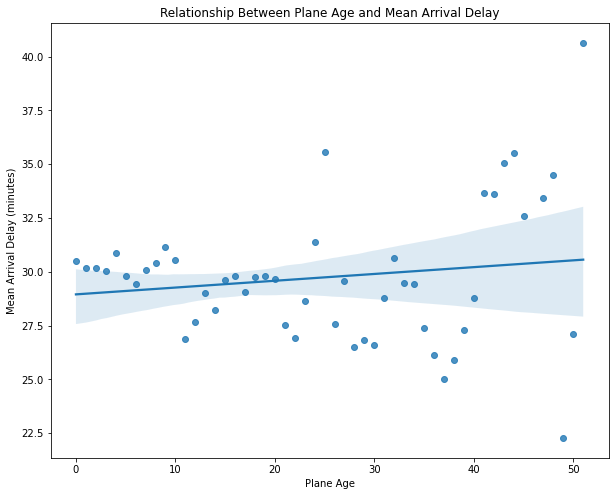

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=yearly_arrivaldata.index, y=yearly_arrivaldata['ArrDelay'], ax=ax)
ax.set_xlabel('Plane Age')
ax.set_ylabel('Mean Arrival Delay (minutes)')
ax.set_title('Relationship Between Plane Age and Mean Arrival Delay')
plt.show()

In [82]:
corr, pval = pearsonr(yearly_arrivaldata['ArrDelay'], yearly_arrivaldata.index)
print('Arrival Delay and Plane Age correlation:', corr)

Arrival Delay and Plane Age correlation: 0.15207852820599324


### Creating a scatter plot to show the relationship between the plane age and mean departure delay

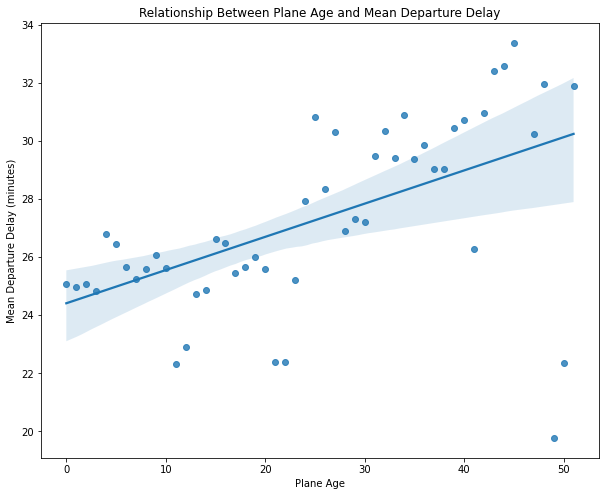

In [83]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=yearly_departuredata.index, y=yearly_departuredata['DepDelay'], ax=ax)
ax.set_xlabel('Plane Age')
ax.set_ylabel('Mean Departure Delay (minutes)')
ax.set_title('Relationship Between Plane Age and Mean Departure Delay')
plt.show()

In [84]:
corr, pval = pearsonr(yearly_departuredata['DepDelay'], yearly_departuredata.index)
print('Departure Delay and Plane Age correlation:', corr)

Departure Delay and Plane Age correlation: 0.549425428970165


### Creating Line Graph to show the trend in departure and arrival mean delays over age of plane

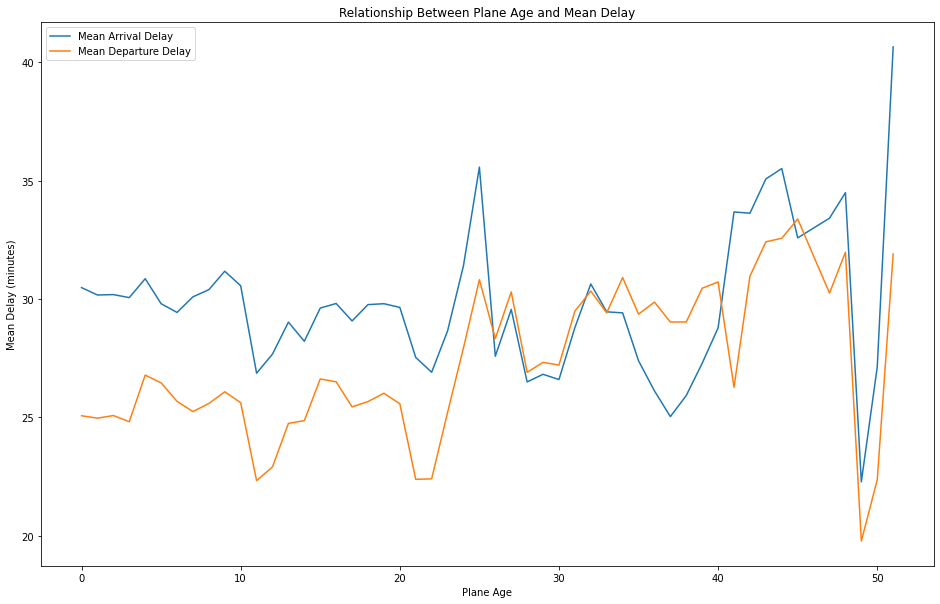

In [85]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(yearly_arrivaldata.index, yearly_arrivaldata['ArrDelay'], label='Mean Arrival Delay')
ax.plot(yearly_departuredata.index, yearly_departuredata['DepDelay'], label='Mean Departure Delay')
ax.legend()
ax.set_xlabel('Plane Age')
ax.set_ylabel('Mean Delay (minutes)')
ax.set_title('Relationship Between Plane Age and Mean Delay')
plt.show()

## Using delay types to see whether older planes suffer more delays

In [86]:
#removing delays with 0 as when calculating mean it will affect the value

In [87]:
#array for each delay type

In [88]:
q2carrierdelays=q2delaytypesdataset[["CarrierDelay","PlaneAge"]]
q2carrierdelays

,CarrierDelay,PlaneAge
7631320,0,51.0
2800185,0,50.0
10752768,73,51.0
1568371,0,50.0
5824806,0,50.0
...,...,...
13926389,0,0.0
13926394,0,0.0
13926403,6,0.0
13926368,0,0.0


In [89]:
q2weatherdelays=q2delaytypesdataset[["WeatherDelay","PlaneAge"]]
q2weatherdelays

,WeatherDelay,PlaneAge
7631320,0,51.0
2800185,0,50.0
10752768,0,51.0
1568371,0,50.0
5824806,0,50.0
...,...,...
13926389,0,0.0
13926394,0,0.0
13926403,0,0.0
13926368,0,0.0


In [90]:
q2NASdelays=q2delaytypesdataset[["NASDelay","PlaneAge"]]
q2NASdelays

,NASDelay,PlaneAge
7631320,0,51.0
2800185,0,50.0
10752768,33,51.0
1568371,0,50.0
5824806,0,50.0
...,...,...
13926389,0,0.0
13926394,0,0.0
13926403,10,0.0
13926368,0,0.0


In [91]:
q2securitydelays=q2delaytypesdataset[["SecurityDelay","PlaneAge"]]
q2securitydelays

,SecurityDelay,PlaneAge
7631320,0,51.0
2800185,0,50.0
10752768,0,51.0
1568371,0,50.0
5824806,0,50.0
...,...,...
13926389,0,0.0
13926394,0,0.0
13926403,0,0.0
13926368,0,0.0


In [92]:
q2lateaircraftdelays=q2delaytypesdataset[["LateAircraftDelay","PlaneAge"]]
q2lateaircraftdelays

,LateAircraftDelay,PlaneAge
7631320,0,51.0
2800185,0,50.0
10752768,0,51.0
1568371,0,50.0
5824806,0,50.0
...,...,...
13926389,0,0.0
13926394,0,0.0
13926403,24,0.0
13926368,0,0.0


In [93]:
#making delays less than 1 null value

In [94]:
q2carrierdelays['CarrierDelay'] = np.where(q2carrierdelays['CarrierDelay'] <1, np.nan, q2carrierdelays['CarrierDelay'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\3923929598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2carrierdelays['CarrierDelay'] = np.where(q2carrierdelays['CarrierDelay'] <1, np.nan, q2carrierdelays['CarrierDelay'])


In [95]:
q2weatherdelays['WeatherDelay'] = np.where(q2weatherdelays['WeatherDelay'] <1, np.nan, q2weatherdelays['WeatherDelay'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\2597825123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2weatherdelays['WeatherDelay'] = np.where(q2weatherdelays['WeatherDelay'] <1, np.nan, q2weatherdelays['WeatherDelay'])


In [96]:
q2NASdelays['NASDelay'] = np.where(q2NASdelays['NASDelay'] <1, np.nan, q2NASdelays['NASDelay'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\490594549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2NASdelays['NASDelay'] = np.where(q2NASdelays['NASDelay'] <1, np.nan, q2NASdelays['NASDelay'])


In [97]:
q2securitydelays['SecurityDelay'] = np.where(q2securitydelays['SecurityDelay'] <1, np.nan, q2securitydelays['SecurityDelay'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\3504271348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2securitydelays['SecurityDelay'] = np.where(q2securitydelays['SecurityDelay'] <1, np.nan, q2securitydelays['SecurityDelay'])


In [98]:
q2lateaircraftdelays['LateAircraftDelay'] = np.where(q2lateaircraftdelays['LateAircraftDelay'] <1, np.nan, q2lateaircraftdelays['LateAircraftDelay'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13764\307795958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2lateaircraftdelays['LateAircraftDelay'] = np.where(q2lateaircraftdelays['LateAircraftDelay'] <1, np.nan, q2lateaircraftdelays['LateAircraftDelay'])


In [99]:
#dropping null values

In [100]:
q2carrierdelays = q2carrierdelays.dropna()
q2carrierdelays

,CarrierDelay,PlaneAge
10752768,73.0,51.0
14515294,96.0,51.0
1568404,27.0,50.0
13851657,24.0,51.0
7001045,19.0,50.0
...,...,...
12070522,7.0,0.0
12070521,91.0,0.0
13926463,3.0,0.0
13926298,9.0,0.0


In [101]:
q2weatherdelays = q2weatherdelays.dropna()
q2weatherdelays

,WeatherDelay,PlaneAge
8256475,112.0,51.0
11404710,109.0,51.0
7663438,88.0,51.0
10754743,8.0,51.0
1567646,66.0,50.0
...,...,...
13930009,10.0,0.0
12063174,56.0,0.0
12036234,52.0,0.0
12054927,2.0,0.0


In [102]:
q2NASdelays = q2NASdelays.dropna()
q2NASdelays

,NASDelay,PlaneAge
10752768,33.0,51.0
13851553,53.0,51.0
3970935,30.0,50.0
11354230,35.0,51.0
14515294,15.0,51.0
...,...,...
12070522,9.0,0.0
12070521,8.0,0.0
13926463,21.0,0.0
13926298,8.0,0.0


In [103]:
q2securitydelays = q2securitydelays.dropna()
q2securitydelays

,SecurityDelay,PlaneAge
4636394,72.0,50.0
4633865,78.0,50.0
11381047,12.0,48.0
4635995,28.0,47.0
4601226,7.0,47.0
...,...,...
12067729,76.0,0.0
13932705,23.0,0.0
13923956,1.0,0.0
12072063,25.0,0.0


In [104]:
q2lateaircraftdelays = q2lateaircraftdelays.dropna()
q2lateaircraftdelays

,LateAircraftDelay,PlaneAge
6991352,18.0,50.0
7001045,13.0,50.0
7001036,64.0,50.0
13851489,41.0,51.0
8256365,99.0,51.0
...,...,...
13926083,86.0,0.0
13926463,21.0,0.0
13926298,9.0,0.0
8372306,64.0,0.0


In [105]:
#rechecking for null values

In [106]:
pd.isnull(q2carrierdelays).sum(axis=0)

CarrierDelay    0
PlaneAge        0
dtype: int64

In [107]:
pd.isnull(q2weatherdelays).sum(axis=0)

WeatherDelay    0
PlaneAge        0
dtype: int64

In [108]:
pd.isnull(q2NASdelays).sum(axis=0)

NASDelay    0
PlaneAge    0
dtype: int64

In [109]:
pd.isnull(q2securitydelays).sum(axis=0)

SecurityDelay    0
PlaneAge         0
dtype: int64

In [110]:
pd.isnull(q2lateaircraftdelays).sum(axis=0)

LateAircraftDelay    0
PlaneAge             0
dtype: int64

In [111]:
#creating boxplot to see its distribution

In [112]:
carrier_delay=q2carrierdelays["CarrierDelay"]

In [113]:
weather_delay=q2weatherdelays["WeatherDelay"]

In [114]:
NAS_delay=q2NASdelays["NASDelay"]

In [115]:
security_delay=q2securitydelays["SecurityDelay"]

In [116]:
lateaircraft_delay=q2lateaircraftdelays["LateAircraftDelay"]

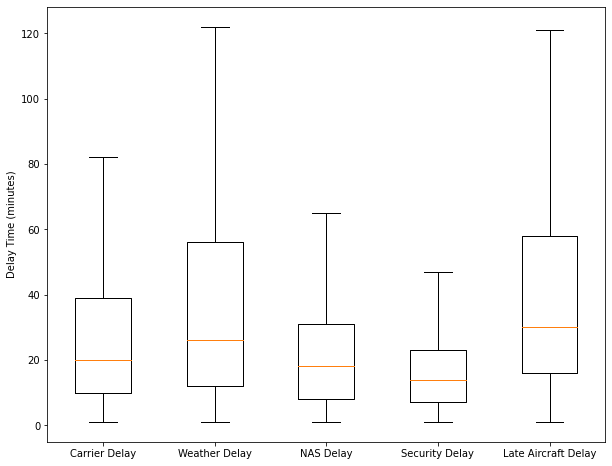

In [117]:
fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot([carrier_delay,weather_delay,NAS_delay,security_delay,lateaircraft_delay],showfliers=False)
ax.set_xticklabels(['Carrier Delay','Weather Delay','NAS Delay','Security Delay','Late Aircraft Delay'])
ax.set_ylabel('Delay Time (minutes)')
plt.show()

In [118]:
#calculating mean for each delay type for each plane age

In [119]:
planeage_avgcarrierdelay = q2carrierdelays.groupby('PlaneAge')['CarrierDelay'].mean().reset_index()

In [120]:
planeage_avgweatherdelay = q2weatherdelays.groupby('PlaneAge')['WeatherDelay'].mean().reset_index()

In [121]:
planeage_avgNASdelay = q2NASdelays.groupby('PlaneAge')['NASDelay'].mean().reset_index()

In [122]:
planeage_avgsecuritydelay = q2securitydelays.groupby('PlaneAge')['SecurityDelay'].mean().reset_index()

In [123]:
planeage_avglateaircraftdelay = q2lateaircraftdelays.groupby('PlaneAge')['LateAircraftDelay'].mean().reset_index()

In [124]:
#merging the mean for each delay types

In [125]:
mergeddelaytypes=pd.merge(planeage_avgcarrierdelay,planeage_avgweatherdelay, on='PlaneAge')
mergeddelaytypes  =pd.merge(mergeddelaytypes,planeage_avgNASdelay, on='PlaneAge')
mergeddelaytypes=pd.merge(mergeddelaytypes,planeage_avgsecuritydelay, on='PlaneAge')
mergeddelaytypes=pd.merge(mergeddelaytypes,planeage_avglateaircraftdelay, on='PlaneAge')

In [126]:
mergeddelaytypes

,PlaneAge,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,29.405948,56.872555,30.470680,18.161392,47.618640
1,1.0,33.196031,54.766110,31.442022,21.876338,48.230951
2,2.0,34.652042,46.993901,30.148546,22.423212,46.414913
3,3.0,37.181135,47.871008,29.582090,21.427247,46.741108
4,4.0,39.455991,49.693081,30.005759,21.942122,48.589323
5,5.0,37.108411,47.354537,28.053572,20.724359,47.608217
6,6.0,35.012287,45.394761,27.761452,20.709887,46.562184
7,7.0,34.261457,44.781573,27.975142,20.789050,46.072649
8,8.0,35.238226,45.077240,28.324883,20.979407,46.212851
9,9.0,36.054073,47.171680,29.490150,18.581028,49.114734


In [127]:
#creating scatter plots to see relationship with delay types and plane age

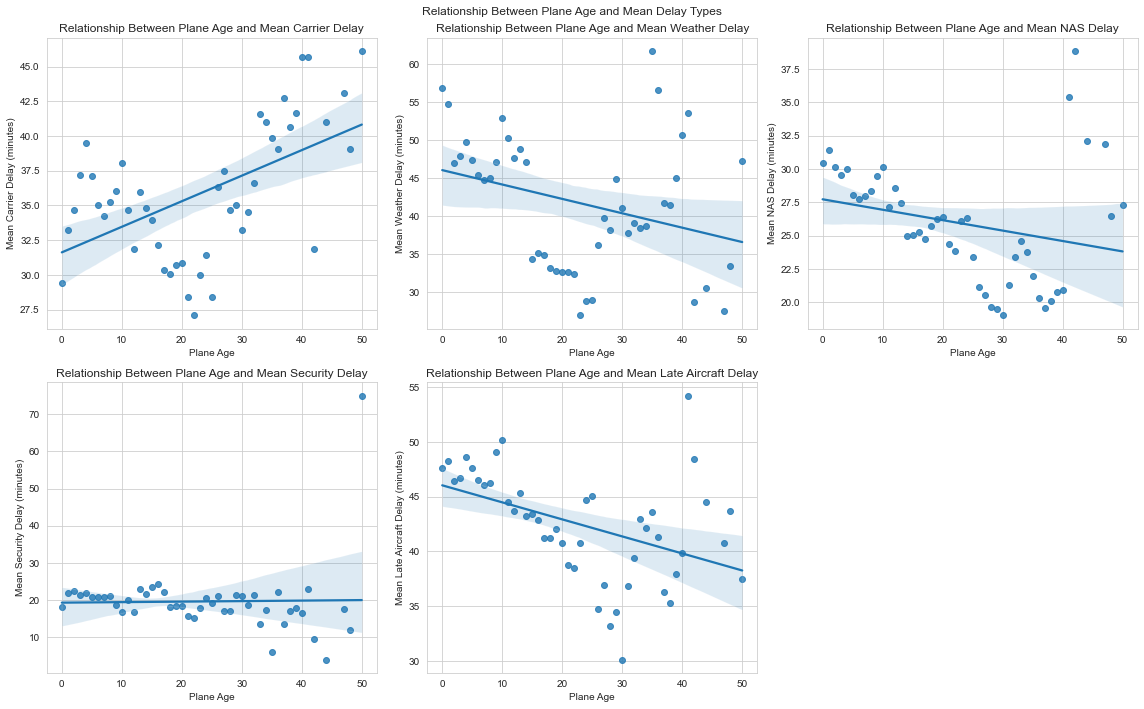

In [128]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
# Carrier Delay
sns.regplot(x='PlaneAge', y='CarrierDelay', data=mergeddelaytypes, ax=axs[0, 0])
axs[0, 0].set_xlabel('Plane Age')
axs[0, 0].set_ylabel('Mean Carrier Delay (minutes)')
axs[0, 0].set_title('Relationship Between Plane Age and Mean Carrier Delay')
# Weather Delay
sns.regplot(x='PlaneAge', y='WeatherDelay', data=mergeddelaytypes, ax=axs[0, 1])
axs[0, 1].set_xlabel('Plane Age')
axs[0, 1].set_ylabel('Mean Weather Delay (minutes)')
axs[0, 1].set_title('Relationship Between Plane Age and Mean Weather Delay')
# NAS Delay
sns.regplot(x='PlaneAge', y='NASDelay', data=mergeddelaytypes, ax=axs[0, 2])
axs[0, 2].set_xlabel('Plane Age')
axs[0, 2].set_ylabel('Mean NAS Delay (minutes)')
axs[0, 2].set_title('Relationship Between Plane Age and Mean NAS Delay')
# Security Delay
sns.regplot(x='PlaneAge', y='SecurityDelay', data=mergeddelaytypes, ax=axs[1, 0])
axs[1, 0].set_xlabel('Plane Age')
axs[1, 0].set_ylabel('Mean Security Delay (minutes)')
axs[1, 0].set_title('Relationship Between Plane Age and Mean Security Delay')
# Late Aircraft Delay
sns.regplot(x='PlaneAge', y='LateAircraftDelay', data=mergeddelaytypes, ax=axs[1, 1])
axs[1, 1].set_xlabel('Plane Age')
axs[1, 1].set_ylabel('Mean Late Aircraft Delay (minutes)')
axs[1, 1].set_title('Relationship Between Plane Age and Mean Late Aircraft Delay')

axs[1, 2].set_visible(False)

fig.suptitle('Relationship Between Plane Age and Mean Delay Types')
fig.tight_layout()
plt.show()

In [129]:
#correlation between delay types

In [130]:
corr, pval = pearsonr(mergeddelaytypes['CarrierDelay'], mergeddelaytypes.index)
print('Carrier Delay and Plane Age correlation:', corr)
corr, pval = pearsonr(mergeddelaytypes['WeatherDelay'], mergeddelaytypes.index)
print('Weather Delay and Plane Age correlation:', corr)
corr, pval = pearsonr(mergeddelaytypes['NASDelay'], mergeddelaytypes.index)
print('NAS Delay and Plane Age correlation:', corr)
corr, pval = pearsonr(mergeddelaytypes['SecurityDelay'], mergeddelaytypes.index)
print('Security Delay and Plane Age correlation:', corr)
corr, pval = pearsonr(mergeddelaytypes['LateAircraftDelay'], mergeddelaytypes.index)
print('Late Aircraft Delay and Plane Age correlation:', corr)

Carrier Delay and Plane Age correlation: 0.5279706010760075
Weather Delay and Plane Age correlation: -0.3015864870648959
NAS Delay and Plane Age correlation: -0.26902662391510784
Security Delay and Plane Age correlation: -0.008603907793773319
Late Aircraft Delay and Plane Age correlation: -0.44998156304739434
